# **Ekstraksi Keywords Berita Online**

**Import Data**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/projectPPW/tugas/radarjatim_fix.csv')
df

,Judul,Content,Category
0,"Elektabilitas Prabowo – Gibran Makin Kuat, Din...",SURABAYA (RadarJatim.id) Lembaga survei Populi...,Nasional
1,"Perbesar Kemenangan, Infrastruktur TKN Prabowo...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional
2,"Rekam Jejak Gemilang, Prabowo – Gibran Duet Pe...",SURABAYA (RadarJatim.id) Calon Presiden (capre...,Nasional
3,Tanpa Basa-Basa Aksi Nyata Prabowo Terima Pulu...,SURABAYA (RadarJatim.id) Menteri Pertahanan (M...,Nasional
4,Dukungan Kuat Khofifah Buka Lebar Jalan Prabow...,SURABAYA (RadarJatim.id) Dukungan Gubernur Jaw...,Nasional
...,...,...,...
258,"Terima Pengaduan Status Tanah, Wawali Armuji G...",SURABAYA (RadarJatim.id) Wakil Wali Kota Surab...,Hukum dan Kriminal
259,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,SIDOARJO (RadarJatim.id) – Penataan ulang Ruta...,Hukum dan Kriminal
260,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,SURABAYA (RadarJatim.id) Komisi Pemberantasan ...,Hukum dan Kriminal
261,Lapas Madiun Gagalkan Penyelundupan Narkoba,SURABAYA (RadarJatim.id) – Jajaran Kanwil Keme...,Hukum dan Kriminal


**Pre-Processing**

Cek Data Kosong & Duplikat

In [3]:
df.isnull().sum()

Judul       0
Content     0
Category    0
dtype: int64

In [4]:
df.duplicated().sum()

0

Cleansing Data

In [5]:
import re, string

# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("â½ïgoal", "", text)
    text = re.sub("SCROLL TO CONTINUE WITH CONTENT", "", text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)


    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [6]:
df['Content'] = df['Content'].apply(lambda x: cleaning(x))

In [7]:
df

,Judul,Content,Category
0,"Elektabilitas Prabowo – Gibran Makin Kuat, Din...",surabaya radarjatim id lembaga survei populi c...,Nasional
1,"Perbesar Kemenangan, Infrastruktur TKN Prabowo...",surabaya radarjatim id calon presiden capres p...,Nasional
2,"Rekam Jejak Gemilang, Prabowo – Gibran Duet Pe...",surabaya radarjatim id calon presiden capres p...,Nasional
3,Tanpa Basa-Basa Aksi Nyata Prabowo Terima Pulu...,surabaya radarjatim id menteri pertaha menhan ...,Nasional
4,Dukungan Kuat Khofifah Buka Lebar Jalan Prabow...,surabaya radarjatim id dukungan gubernur jawa ...,Nasional
...,...,...,...
258,"Terima Pengaduan Status Tanah, Wawali Armuji G...",surabaya radarjatim id wakil wali kota surabay...,Hukum dan Kriminal
259,Hunian Rutan Surabaya Meningkat Hingga 150 Persen,sidoarjo radarjatim id penataan ulang rutan i ...,Hukum dan Kriminal
260,KPK Lelang 14 Barang Eks Gratifikasi di Road t...,surabaya radarjatim id komisi pemberantasan ko...,Hukum dan Kriminal
261,Lapas Madiun Gagalkan Penyelundupan Narkoba,surabaya radarjatim id jajaran kanwil kemenkum...,Hukum dan Kriminal


Tokenisasi Data

In [8]:
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
df["Tokenizing_Content"] = df['Content'].apply(sent_tokenize)
df.head()

,Judul,Content,Category,Tokenizing_Content
0,"Elektabilitas Prabowo – Gibran Makin Kuat, Din...",surabaya radarjatim id lembaga survei populi c...,Nasional,[surabaya radarjatim id lembaga survei populi ...
1,"Perbesar Kemenangan, Infrastruktur TKN Prabowo...",surabaya radarjatim id calon presiden capres p...,Nasional,[surabaya radarjatim id calon presiden capres ...
2,"Rekam Jejak Gemilang, Prabowo – Gibran Duet Pe...",surabaya radarjatim id calon presiden capres p...,Nasional,[surabaya radarjatim id calon presiden capres ...
3,Tanpa Basa-Basa Aksi Nyata Prabowo Terima Pulu...,surabaya radarjatim id menteri pertaha menhan ...,Nasional,[surabaya radarjatim id menteri pertaha menhan...
4,Dukungan Kuat Khofifah Buka Lebar Jalan Prabow...,surabaya radarjatim id dukungan gubernur jawa ...,Nasional,[surabaya radarjatim id dukungan gubernur jawa...


StopWords Data

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
from nltk.corpus import stopwords
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian')))
df['Tokenizing_Content'] = df['Tokenizing_Content'].apply(lambda x: [w for w in x if not w in stop_words])

In [12]:
df['Content'] = df['Tokenizing_Content'].apply(lambda tokens: ' '.join(tokens))

In [13]:
df.head()

,Judul,Content,Category,Tokenizing_Content
0,"Elektabilitas Prabowo – Gibran Makin Kuat, Din...",surabaya radarjatim id lembaga survei populi c...,Nasional,[surabaya radarjatim id lembaga survei populi ...
1,"Perbesar Kemenangan, Infrastruktur TKN Prabowo...",surabaya radarjatim id calon presiden capres p...,Nasional,[surabaya radarjatim id calon presiden capres ...
2,"Rekam Jejak Gemilang, Prabowo – Gibran Duet Pe...",surabaya radarjatim id calon presiden capres p...,Nasional,[surabaya radarjatim id calon presiden capres ...
3,Tanpa Basa-Basa Aksi Nyata Prabowo Terima Pulu...,surabaya radarjatim id menteri pertaha menhan ...,Nasional,[surabaya radarjatim id menteri pertaha menhan...
4,Dukungan Kuat Khofifah Buka Lebar Jalan Prabow...,surabaya radarjatim id dukungan gubernur jawa ...,Nasional,[surabaya radarjatim id dukungan gubernur jawa...


**Co-Occurency Matriks**

In [14]:
df['Content'][0]

'surabaya radarjatim id lembaga survei populi center baru saja merilis hasil jajak pendapatnya yang menunjukan calon presiden capres prabowo subianto dan calon wakil presiden cawapres gibran rakabuming raka sebagai pasangan terkuat tingginya raihan elektabilitas keduanya berkat personalitas dan gelombang dukungan kuat dari berbagai kalangan hasil survei populi center periode oktober hingga november mencatatkan prabowo gibran mendapat elektabilitas sebesar persen unggul dari ganjar pranowo mahfud md dengan persen dan anies baswedan muhaimin iskandar persen direktur executive partner politics indonesia ab solissa mengatakan besarnya elektabilitas prabowo gibran tak lepas dari banyaknya dukungan dari masyarakat akar rumput dengan modal tersebut sangat wajar jika hasil survei menunjukan elektabilitas keduanya sangat besar dan kuat besarnya dukungan terhadap pasangan prabowo gibran juga tak lepas dari faktor personalitas dan dukungan politik yang besar kata solissa selain itu formasi koalis

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split())
X = vectorizer.fit_transform([df['Content'][0]])

co_occurrence_matrix = (X.T * X)
co_occurrence_matrix.setdiag(0)

co_occurrence_df = pd.DataFrame(co_occurrence_matrix.toarray(), columns=vectorizer.get_feature_names_out(),index=vectorizer.get_feature_names_out())
co_occurrence_df

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,ab,adanya,akar,anies,bagus,bahkan,banyak,banyaknya,baru,baswedan,...,terhadap,terkuat,termasuk,tersebut,tingginya,ucapnya,unggul,wajar,wakil,yang
ab,0,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
adanya,1,0,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
akar,1,1,0,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
anies,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,8
bagus,1,1,1,2,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ucapnya,1,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,4
unggul,1,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,4
wajar,1,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,4
wakil,1,1,1,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,4


**Graph Co-occurency**

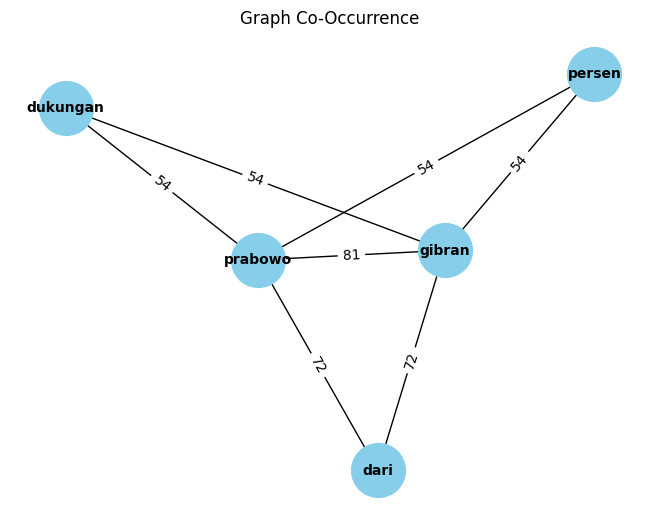

In [16]:
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
G = nx.Graph()
for idx, row in co_occurrence_df.iterrows():
    for col in co_occurrence_df.columns:
        weight = co_occurrence_df.loc[idx, col]
        if weight > 50 and idx != col:
            G.add_edge(idx, col, weight=weight)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Graph Co-Occurrence')
plt.show()

**Closeness Centrality**

In [17]:
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:")
for node, closeness in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {closeness}")

Closeness Centrality:
gibran: 1.0
prabowo: 1.0
dari: 0.6666666666666666
dukungan: 0.6666666666666666
persen: 0.6666666666666666


**PageRank Centrality**

PageRank adalah algoritme analisis tautan dan memberikan bobot numerik pada setiap elemen kumpulan dokumen yang diberi hyperlink , seperti World Wide Web , dengan tujuan "mengukur" kepentingan relatifnya dalam kumpulan tersebut. Algoritme ini dapat diterapkan pada kumpulan entitas mana pun dengan kutipan dan referensi timbal balik . Bobot numerik yang diberikan pada elemen E disebut sebagai PageRank dari E dan dilambangkan dengan PR(E)

PageRank dihasilkan dari algoritme matematis berdasarkan webgraph , yang dibuat oleh semua halaman World Wide Web sebagai node dan hyperlink sebagai edge, dengan mempertimbangkan hub otoritas seperti cnn.com atau mayoclinic.org . Nilai peringkat menunjukkan pentingnya halaman tertentu. Hyperlink ke halaman dihitung sebagai suara dukungan. PageRank suatu halaman ditentukan secara rekursif dan bergantung pada jumlah dan metrik PageRank dari semua halaman yang tertaut ke halaman tersebut (" link masuk "). Sebuah halaman yang ditautkan oleh banyak halaman dengan PageRank tinggi akan menerima peringkat tinggi itu sendiri.

**Rumus : $PR(u) = \left (1 - d  \right ). \frac{1}{N} + d. \sum\upsilon\varepsilon Bu \frac{PR(u)}{l(u)}$**

KETERANGAN
* PR(u), meruapakan PageRank dari halaman ( u )
* d, merupakan damping factor, yang nilai deafult nya biasa diatur 0,85
* N, merupakan jumlah total halaman (node) dalam graph
* Bu, merupakan himpunan dari halaman yang memiliki tautan pada halaman ( u )
* L(v), merupakan jumlah tautan output dari halaman ( v )


In [18]:
pagerank = nx.pagerank(G)
print("\nPageRank:")
for node, rank in sorted(pagerank.items(), key=lambda x: x[1], reverse=True):
    print(f"{node}: {rank}")


PageRank:
gibran: 0.28684822781318925
prabowo: 0.28684822781318925
dari: 0.16452141774944873
dukungan: 0.13089106331208655
persen: 0.13089106331208655


**Perhitungan Manual Page Rank**

In [19]:
pageRank = pd.read_excel('/content/drive/MyDrive/projectPPW/tugas/pageRank.xlsx')
df_pagerank = pageRank.fillna('')
df_pagerank

,Iterasi,Kata 1,Kata 2,Kata 3,Kata 4,Kata 5,"DEFAULT DAMPING FACTOR = 0,85"
0,,gibran,prabowo,dari,dukungan,persen,
1,1,0.071,0.071,0.071,0.071,0.071,
2,2,0.135612,0.135612,0.060175,0.060175,0.060175,
3,3,0.135541,0.135541,0.087635,0.087635,0.087635,
4,,,,,,,
5,,,,,,,
6,Kata,IN,OUT,,Iterasi 2,Iterasi 3,
7,gibran,4,4,,0.12425,0.124166,
8,prabowo,4,4,,0.12425,0.124166,
9,dari,2,2,,0.0355,0.067806,


**Rangking Kata Penting dari Centrality**

In [ ]:
df['Content'][0]

'surabaya radarjatim id lembaga survei populi center baru saja merilis hasil jajak pendapatnya yang menunjukan calon presiden capres prabowo subianto dan calon wakil presiden cawapres gibran rakabuming raka sebagai pasangan terkuat tingginya raihan elektabilitas keduanya berkat personalitas dan gelombang dukungan kuat dari berbagai kalangan hasil survei populi center periode oktober hingga november mencatatkan prabowo gibran mendapat elektabilitas sebesar persen unggul dari ganjar pranowo mahfud md dengan persen dan anies baswedan muhaimin iskandar persen direktur executive partner politics indonesia ab solissa mengatakan besarnya elektabilitas prabowo gibran tak lepas dari banyaknya dukungan dari masyarakat akar rumput dengan modal tersebut sangat wajar jika hasil survei menunjukan elektabilitas keduanya sangat besar dan kuat besarnya dukungan terhadap pasangan prabowo gibran juga tak lepas dari faktor personalitas dan dukungan politik yang besar kata solissa selain itu formasi koalis

In [ ]:
ranking_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
print("Ranking Kata pada dokumen ini:")
for i, (node, closeness) in enumerate(ranking_closeness, 1):
    print(f"Rank {i}: Kata {node} nilai {closeness}")

Ranking Kata pada dokumen ini:
Rank 1: Kata gibran nilai 1.0
Rank 2: Kata prabowo nilai 1.0
Rank 3: Kata dari nilai 0.6666666666666666
Rank 4: Kata dukungan nilai 0.6666666666666666
Rank 5: Kata persen nilai 0.6666666666666666
